In [78]:
### Author : Prasad Meesala
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics, model_selection

In [79]:
# Collecting the data

df = pd.read_csv(r"Datasets\bmi.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB
None


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


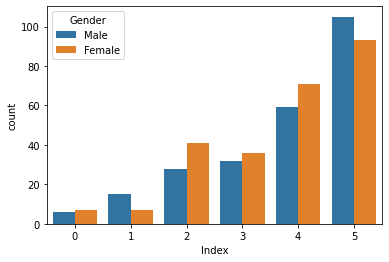

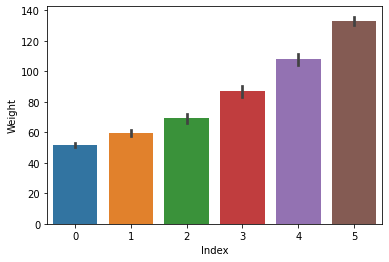

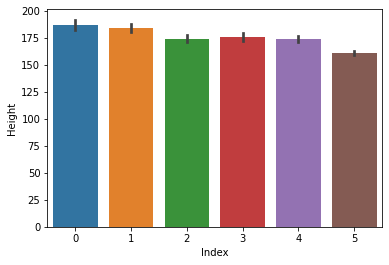

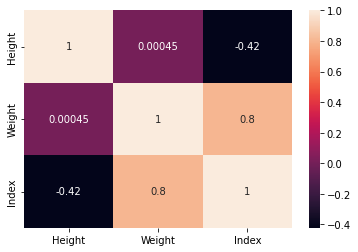

In [80]:
# Data Visualization

sns.countplot(x = 'Index', hue = 'Gender', data = df)
plt.show()

sns.barplot(x = 'Index', y = 'Weight', data = df)
plt.show()

sns.barplot(x = 'Index', y = 'Height', data = df)
plt.show()

sns.heatmap(df.corr(), annot = True)
plt.show()

In [81]:
# One hot encoding (creating dummy variables)

df = pd.read_csv(r"Datasets\bmi.csv")
gender = pd.get_dummies(df['Gender'])
df = pd.concat([df, gender], axis = 1)
df.drop(['Gender', 'Male'], axis = 1, inplace = True)
print(df)

     Height  Weight  Index  Female
0       174      96      4       0
1       189      87      2       0
2       185     110      4       1
3       195     104      3       1
4       149      61      3       0
..      ...     ...    ...     ...
495     150     153      5       1
496     184     121      4       1
497     141     136      5       1
498     150      95      5       0
499     173     131      5       0

[500 rows x 4 columns]


In [82]:
# Splitting the data into training and testing data

X = df.drop('Index', axis = 1).values
y = df['Index'].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1)

print(len(X_train), len(X_test))

400 100


In [83]:
# Training the model with the data

model = linear_model.LogisticRegression()

model.fit(X_train, y_train)

c:\Users\meesa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
# Testing the model and predicting the outcome

y_predicted = model.predict(X_test)
print(y_predicted, y_test)

[5 3 4 2 5 4 5 0 4 5 4 3 5 4 4 4 2 4 5 4 3 5 5 0 5 4 5 4 4 3 4 5 3 5 4 5 2
 2 4 4 3 3 5 5 5 4 5 5 2 5 4 0 4 2 5 0 2 5 5 3 2 0 5 4 2 5 1 5 5 3 5 3 5 5
 5 5 5 1 3 5 4 5 3 4 2 5 4 5 5 5 2 5 2 4 5 3 4 4 5 3] [5 3 4 2 5 4 5 1 4 5 5 3 5 4 4 4 2 5 5 3 4 5 5 0 5 4 5 4 4 3 3 5 3 5 4 5 2
 3 4 4 2 2 5 5 5 3 5 5 2 5 4 0 3 2 5 0 2 5 5 2 2 0 5 5 2 5 2 5 4 3 5 4 5 5
 5 5 5 1 3 5 5 5 3 4 2 5 4 4 5 5 2 5 2 5 5 4 4 3 5 4]


In [85]:
# Checking the accuaracy of the model

print(f"Accuracy : {metrics.r2_score(y_test, y_predicted)}")
print(metrics.classification_report(y_test, y_predicted))

Accuracy : 0.8869417750141323
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.50      0.50      0.50         2
           2       0.92      0.73      0.81        15
           3       0.50      0.54      0.52        13
           4       0.62      0.73      0.67        22
           5       0.95      0.89      0.92        44

    accuracy                           0.78       100
   macro avg       0.71      0.73      0.72       100
weighted avg       0.80      0.78      0.79       100

